In [99]:
# Import all the necessary libraries
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import requests
import os
import pandas as pd
import numpy as np
import warnings

# Do not print warnings
warnings.filterwarnings('ignore')

# 1. site effects dataset

In [116]:
site_effect = pd.read_csv('site-effects.txt', sep='\s+', error_bad_lines=False, index_col=False, dtype='unicode')
site_effect

,HugoSymbol,Location,InteractionType,Status
0,BCR/ABL fusion,Y177,PHOSPHORYLATION,1
1,AANAT,T31,PHOSPHORYLATION,0
2,AATF,S143,PHOSPHORYLATION,1
3,AATF,S189,PHOSPHORYLATION,1
4,AATF,S477,PHOSPHORYLATION,1
...,...,...,...,...
10585,ZRANB1,T35,PHOSPHORYLATION,1
10586,ZWINT,S250,PHOSPHORYLATION,0
10587,ZWINT,S262,PHOSPHORYLATION,0
10588,ZWINT,T251,PHOSPHORYLATION,0


In [101]:
site_effect['InteractionType'].value_counts()

PHOSPHORYLATION    9682
ACETYLATION         648
METHYLATION         148
UBIQUITINATION      112
Name: InteractionType, dtype: int64

In [120]:
site_effect['Location'].value_counts().head(25)

S12     25
S19     22
S20     21
S21     21
S36     21
S14     19
S83     19
S27     18
S44     17
S7      17
S13     17
S11     17
S181    17
S18     16
S28     16
S88     16
S293    16
S96     16
S183    16
S8      16
S15     16
S184    15
S65     15
S39     15
S215    15
Name: Location, dtype: int64

---

# 2. OncoKB Cancer Gene List

In [102]:
onco_KB = pd.read_csv('OncoKB-CancerGeneList.tsv', sep='\s+', error_bad_lines=False, index_col=False, dtype='unicode')
onco_KB

,HugoSymbol,EntrezGeneID,Isoform,RefSeq,#ofOccurrenceWithinResources(Column-D-J),OncoKBAnnotated,IsOncogene,IsTumorSuppressorGene,MSK-IMPACT,MSK-HEME,FOUNDATIONONE,FOUNDATION-ONE-HEME,Vogelstein,SANGERCGC(05/30/2017)
0,LYL1,4066,2,No,No,No,No,No,No,Yes,No,Yes,NaN,NaN
1,LYN,4067,ENST00000519728,NM_002350.3,4,Yes,Yes,No,Yes,Yes,Yes,No,No,No
2,SH2D1A,4068,ENST00000371139,NM_002351.4,3,Yes,No,Yes,Yes,Yes,No,No,No,No
3,OLIG2,10215,1,No,No,No,No,No,No,No,No,Yes,NaN,NaN
4,EPCAM,4072,ENST00000263735,NM_002354.2,3,Yes,No,Yes,Yes,Yes,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,GREM1,26585,ENST00000300177,NM_013372.6,3,Yes,Yes,No,Yes,Yes,No,No,No,No
1055,EGFL7,51162,ENST00000308874,NM_201446.2,3,Yes,Yes,No,Yes,Yes,No,No,No,No
1056,LTK,4058,1,No,No,No,No,No,Yes,No,No,No,NaN,NaN
1057,SPRTN,83932,ENST00000295050,NM_032018.6,2,Yes,No,Yes,Yes,No,No,No,No,No


#### Removind unnecessary columns except IsOncogene and IsTumorSupressorGene

In [103]:
onco_KB = onco_KB[['HugoSymbol', 'IsOncogene', 'IsTumorSuppressorGene']]
onco_KB

,HugoSymbol,IsOncogene,IsTumorSuppressorGene
0,LYL1,No,No
1,LYN,Yes,No
2,SH2D1A,No,Yes
3,OLIG2,No,No
4,EPCAM,No,Yes
...,...,...,...
1054,GREM1,Yes,No
1055,EGFL7,Yes,No
1056,LTK,No,No
1057,SPRTN,No,Yes


In [104]:
# Export to csv
onco_KB.to_csv('data/OncoKBCancerGeneList.csv', index=False)

#### Print counts of IsOncogene and IsTumorSupressorGene

No     769
Yes    290
Name: IsOncogene, dtype: int64


<AxesSubplot:>

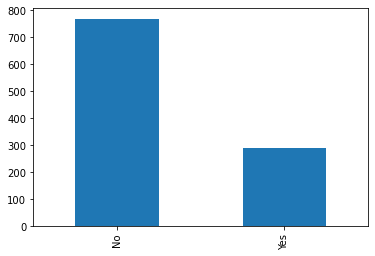

In [105]:
print(onco_KB['IsOncogene'].value_counts())
pd.value_counts(onco_KB['IsOncogene']).plot.bar()

No     758
Yes    301
Name: IsTumorSuppressorGene, dtype: int64


<AxesSubplot:>

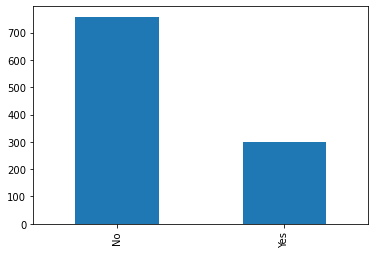

In [106]:
print(onco_KB['IsTumorSuppressorGene'].value_counts())
pd.value_counts(onco_KB['IsTumorSuppressorGene']).plot.bar()

In [107]:
# Genes which are behaving as both tumor supressor and oncogene
both = onco_KB[onco_KB['IsOncogene'] == 'Yes']
both = both[both['IsTumorSuppressorGene'] == 'Yes']

both.shape

(39, 3)

In [108]:
# Genes which are behaving as both tumor supressor and oncogene
bothNot = onco_KB[onco_KB['IsOncogene'] == 'No']
bothNot = bothNot[bothNot['IsTumorSuppressorGene'] == 'No']

bothNot

,HugoSymbol,IsOncogene,IsTumorSuppressorGene
0,LYL1,No,No
3,OLIG2,No,No
5,LEF1,No,No
6,RPL5,No,No
9,HIST2H3C,No,No
...,...,...,...
1051,TAF15,No,No
1052,ELK4,No,No
1053,ELN,No,No
1056,LTK,No,No


#### Plotting values for better insights

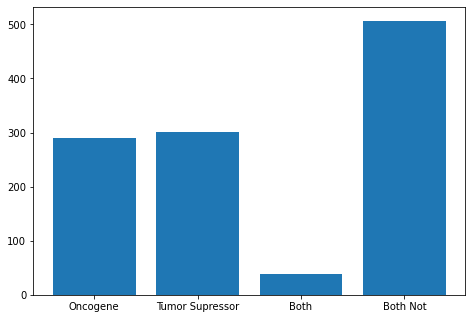

In [109]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Oncogene', 'Tumor Supressor', 'Both', 'Both Not']
values = [onco_KB['IsOncogene'].value_counts()[1], df2['IsTumorSuppressorGene'].value_counts()[1], both.shape[0], bothNot.shape[0]]
ax.bar(langs, values)
plt.show()

---

# 3. Causal priors dataset

In [110]:
fields = ['Gene', 'InteractionType', 'Output', 'URL', 'Location']
causal_prior = pd.read_csv('causal-priors.txt', sep='\t', error_bad_lines=False, index_col=False, dtype='unicode', skipinitialspace=True)
causal_prior.columns = fields
causal_prior.head(25)

,Gene,InteractionType,Output,URL,Location
0,SULT1A1,consumes,CHEBI:207496,http://pathwaycommons.org/pc12/BiochemicalReac...,NaN
1,INS,phosphorylates,IRS2,http://pathwaycommons.org/pc12/BiochemicalReac...,NaN
2,INS,phosphorylates,IRS4,http://pathwaycommons.org/pc12/BiochemicalReac...,NaN
3,MAK,upregulates-expression,KLK3,http://pathwaycommons.org/pc12/TemplateReactio...,NaN
4,HDAC4,deacetylates,YWHAE,PMID:19608861,K123;K50;K118
5,INS,phosphorylates,IRS1,http://pathwaycommons.org/pc12/BiochemicalReac...,NaN
6,CDIPT,produces,CHEBI:73229,http://pathwaycommons.org/pc12/Catalysis_377b1...,NaN
7,SULT2A1,produces,CHEBI:16325,http://pathwaycommons.org/pc12/Control_c53153b...,NaN
8,TPCN1,dephosphorylates,RHO,http://identifiers.org/reactome/R-HSA-2581474 ...,S338;S334;S343
9,TPCN2,dephosphorylates,RHO,http://identifiers.org/reactome/R-HSA-2581474 ...,S338;S334;S343


#### Removing small chemical compunds CHEBI

In [111]:
causal_pr = causal_prior[~causal_prior["Output"].str.contains("CHEBI")]
causal_pr.reset_index(drop=True, inplace=True)
causal_pr

,Gene,InteractionType,Output,URL,Location
0,INS,phosphorylates,IRS2,http://pathwaycommons.org/pc12/BiochemicalReac...,NaN
1,INS,phosphorylates,IRS4,http://pathwaycommons.org/pc12/BiochemicalReac...,NaN
2,MAK,upregulates-expression,KLK3,http://pathwaycommons.org/pc12/TemplateReactio...,NaN
3,HDAC4,deacetylates,YWHAE,PMID:19608861,K123;K50;K118
4,INS,phosphorylates,IRS1,http://pathwaycommons.org/pc12/BiochemicalReac...,NaN
...,...,...,...,...,...
45576,LEF1,upregulates-expression,MMP2,http://pathwaycommons.org/pc12/TemplateReactio...,NaN
45577,BAMBI,dephosphorylates,TGFBR3,http://pathwaycommons.org/pc12/ComplexAssembly...,T842
45578,BAMBI,dephosphorylates,TGFBR1,http://pathwaycommons.org/pc12/ComplexAssembly...,T176;S165;S172
45579,ARNT,upregulates-expression,FLT1,http://pathwaycommons.org/pc12/TemplateReactio...,NaN


In [112]:
causal_pr['InteractionType'].value_counts()

phosphorylates              25549
upregulates-expression       8942
dephosphorylates             4648
downregulates-expression     2897
deacetylates                 1210
acetylates                   1020
methylates                    714
demethylates                  329
activates-gtpase              210
inhibits-gtpase                62
Name: InteractionType, dtype: int64

In [113]:
#Deleting URL column from causal priors
causal_pr = causal_pr[['Gene', 'InteractionType', 'Output', 'Location']]
causal_pr

,Gene,InteractionType,Output,Location
0,INS,phosphorylates,IRS2,NaN
1,INS,phosphorylates,IRS4,NaN
2,MAK,upregulates-expression,KLK3,NaN
3,HDAC4,deacetylates,YWHAE,K123;K50;K118
4,INS,phosphorylates,IRS1,NaN
...,...,...,...,...
45576,LEF1,upregulates-expression,MMP2,NaN
45577,BAMBI,dephosphorylates,TGFBR3,T842
45578,BAMBI,dephosphorylates,TGFBR1,T176;S165;S172
45579,ARNT,upregulates-expression,FLT1,NaN


In [114]:
# Counting NaN location values in causal priors
causal_pr['Location'].isna().sum()

23988

In [121]:
causal_pr['Location'].value_counts().head(25)

S15                                      276
Y172                                     217
Y173                                     217
Y174                                     206
S602;T599                                185
Y783;Y771;Y1253;Y472                     137
Y90                                      126
T183                                     118
T172                                     118
S14                                      114
S568                                     109
S338;S334;S343                           106
S1127;S1107;S1084;S1089                  106
Y185;T183                                102
S196                                     101
T180;Y182                                 99
Y145;Y113;Y128                            99
T182;Y184                                 90
Y203;T201                                 88
Y323;Y525;Y348;Y526;Y352;Y131             85
S338;S494;T491;Y341                       84
S657                                      82
T634;T499;